# Data Analysis for a  Graduate addmission 

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

You can download this dataset from the link:https://www.kaggle.com/mohansacharya/graduate-admissions

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )                                                                                                       
TOEFL Scores ( out of 120 )                                                                                                     
University Rating ( out of 5 )                                                                                                 
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )                                                         
Undergraduate GPA ( out of 10 )                                                                                                 
Research Experience ( either 0 or 1 )                                                                                           
Chance of Admit ( ranging from 0 to 1 )                                                                                         


I have used many algorithms and tools to predict some analysis of this dataset .                                               
I learnt from scratch from website https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas and now I am able to do my self mini project for analysis. 

In [1]:
project_name = "foreign_university_admission_criteria" # change this

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name,files=['main.csv','extra_info.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "himithnainwal/foreign-university-admission-criteria" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/himithnainwal/foreign-university-admission-criteria


'https://jovian.ml/himithnainwal/foreign-university-admission-criteria'

## Let's import all the modules we need during analysis

In [5]:
import pandas as pd         #Pandas is mainly used for data analysis.
import numpy as np        
import seaborn as sns       #for graph 
import matplotlib as plt    #for graphs and visualisations
%matplotlib inline

## Data Preparation 
We will prepare data for analysis.

#### Let's upload the main csv file 

In [6]:
main_df=pd.read_csv('main.csv')
main_df

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit
0,1,337,118,4,0.92
1,2,324,107,4,0.76
2,3,316,104,3,0.72
3,4,322,110,3,0.80
4,5,314,103,2,0.65
...,...,...,...,...,...
495,496,332,108,5,0.87
496,497,337,117,5,0.96
497,498,330,120,5,0.93
498,499,312,103,4,0.73


In [7]:
main_df.shape

(500, 5)

#### Let's add another data frame for more info

In [8]:
extra_info_df=pd.read_csv("extra_info.csv")
extra_info_df

,Serial_num,SOP,LOR,CGPA,Research
0,1,4.5,4.5,9.65,1
1,2,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,4,3.5,2.5,8.67,1
4,5,2.0,3.0,8.21,0
...,...,...,...,...,...
495,496,4.5,4.0,9.02,1
496,497,5.0,5.0,9.87,1
497,498,4.5,5.0,9.56,1
498,499,4.0,5.0,8.43,0


#### Now we will merge two dataframes.
We can now add the columns from extra_info_df into main_df using the .merge method.

In [9]:
raw_df =main_df.merge(extra_info_df,on="Serial_num",how='inner')
raw_df

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
0,1,337,118,4,0.92,4.5,4.5,9.65,1
1,2,324,107,4,0.76,4.0,4.5,8.87,1
2,3,316,104,3,0.72,3.0,3.5,8.00,1
3,4,322,110,3,0.80,3.5,2.5,8.67,1
4,5,314,103,2,0.65,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,0.87,4.5,4.0,9.02,1
496,497,337,117,5,0.96,5.0,5.0,9.87,1
497,498,330,120,5,0.93,4.5,5.0,9.56,1
498,499,312,103,4,0.73,4.0,5.0,8.43,0


##### Let's find out all the columns.

In [10]:
raw_df.columns

Index(['Serial_num', 'GRE_score', 'TOEFL_score', 'University_rating',
       'Chance_of_Admit ', 'SOP', 'LOR ', 'CGPA', 'Research'],
      dtype='object')

In [11]:
admission_analysis_df=raw_df
admission_analysis_df.columns = admission_analysis_df.columns.str.strip()
from IPython.display import display
with pd.option_context('display.max_rows',500):
    display(admission_analysis_df)

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
0,1,337,118,4,0.92,4.5,4.5,9.65,1
1,2,324,107,4,0.76,4.0,4.5,8.87,1
2,3,316,104,3,0.72,3.0,3.5,8.00,1
3,4,322,110,3,0.80,3.5,2.5,8.67,1
4,5,314,103,2,0.65,2.0,3.0,8.21,0
5,6,330,115,5,0.90,4.5,3.0,9.34,1
6,7,321,109,3,0.75,3.0,4.0,8.20,1
7,8,308,101,2,0.68,3.0,4.0,7.90,0
8,9,302,102,1,0.50,2.0,1.5,8.00,0
9,10,323,108,3,0.45,3.5,3.0,8.60,0


In [12]:
admission_analysis_df.columns

Index(['Serial_num', 'GRE_score', 'TOEFL_score', 'University_rating',
       'Chance_of_Admit', 'SOP', 'LOR', 'CGPA', 'Research'],
      dtype='object')

In [13]:
admission_analysis_df.shape       # To find the shape of the dataset / dataframe.

(500, 9)

##### use of .info()
This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

In [14]:
admission_analysis_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_num         500 non-null    int64  
 1   GRE_score          500 non-null    int64  
 2   TOEFL_score        500 non-null    int64  
 3   University_rating  500 non-null    int64  
 4   Chance_of_Admit    500 non-null    float64
 5   SOP                500 non-null    float64
 6   LOR                500 non-null    float64
 7   CGPA               500 non-null    float64
 8   Research           500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 39.1 KB


#### use of .describe()
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

In [15]:
admission_analysis_df.describe()

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,0.72174,3.374000,3.48400,8.576440,0.560000
std,144.481833,11.295148,6.081868,1.143512,0.14114,0.991004,0.92545,0.604813,0.496884
min,1.000000,290.000000,92.000000,1.000000,0.34000,1.000000,1.00000,6.800000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,0.63000,2.500000,3.00000,8.127500,0.000000
50%,250.500000,317.000000,107.000000,3.000000,0.72000,3.500000,3.50000,8.560000,1.000000
75%,375.250000,325.000000,112.000000,4.000000,0.82000,4.000000,4.00000,9.040000,1.000000
max,500.000000,340.000000,120.000000,5.000000,0.97000,5.000000,5.00000,9.920000,1.000000


#### So now we are done with the cleaning and we have optimised dataset for analysis .
Let's move on to visualisation now.

In [16]:
import jovian

In [14]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "himithnainwal/foreign-university-admission-criteria" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/himithnainwal/foreign-university-admission-criteria


'https://jovian.ml/himithnainwal/foreign-university-admission-criteria'

## Exploratory Analysis and Visualization


#### While analysis it's easy to get information from a visual format .
So we will use python libraries mainly seaborn and matplotlib and other tools for numerical computation.

### So let's start extracting.

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Sample() is used to get some random rows from the data frame.

In [19]:
admission_analysis_df.sample(10)

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
277,278,320,101,2,0.70,2.5,3.0,8.62,0
459,460,329,113,4,0.89,4.0,3.5,9.36,1
488,489,322,112,3,0.76,3.0,4.0,8.62,1
376,377,297,96,2,0.34,2.5,2.0,7.43,0
2,3,316,104,3,0.72,3.0,3.5,8.00,1
163,164,317,105,3,0.68,3.5,3.0,8.56,0
496,497,337,117,5,0.96,5.0,5.0,9.87,1
274,275,315,100,1,0.58,2.0,2.5,7.95,0
239,240,299,100,1,0.59,1.5,2.0,7.89,0
230,231,313,104,3,0.73,4.0,4.5,8.65,0


Sort method is used to get the top 20 candidates with the highest chance of admission.

In [20]:
toppers=admission_analysis_df.sort_values(by=['Chance_of_Admit'],ascending=False).head(20)
toppers

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
202,203,340,120,5,0.97,4.5,4.5,9.91,1
143,144,340,120,4,0.97,4.5,4.0,9.92,1
24,25,336,119,5,0.97,4.0,3.5,9.80,1
203,204,334,120,5,0.97,4.0,5.0,9.87,1
71,72,336,112,5,0.96,5.0,5.0,9.76,1
213,214,333,119,5,0.96,5.0,4.5,9.78,1
496,497,337,117,5,0.96,5.0,5.0,9.87,1
81,82,340,120,4,0.96,5.0,5.0,9.50,1
130,131,339,114,5,0.96,4.0,4.5,9.76,1
148,149,339,116,4,0.96,4.0,3.5,9.80,1


We will store CGPA-wise data along with specifying mean method to aggregate the data for each group in a new variable dataframe.

In [21]:
admission_analysis_cgpa_df = admission_analysis_df.groupby('CGPA')[['Chance_of_Admit', 'GRE_score', 'TOEFL_score']].mean().sample(100)
admission_analysis_cgpa_df 

,Chance_of_Admit,GRE_score,TOEFL_score
CGPA,,,
9.06,0.866667,328.666667,111.666667
7.20,0.460000,295.000000,93.000000
9.76,0.960000,337.500000,113.000000
7.36,0.460000,294.000000,93.000000
8.49,0.685000,313.000000,103.000000
...,...,...,...
7.65,0.542000,307.400000,102.600000
8.97,0.832500,321.750000,109.750000
7.97,0.560000,302.000000,99.000000


Now we will draw a Bar graph to visualize how the average chance of admission varies on CGPA.

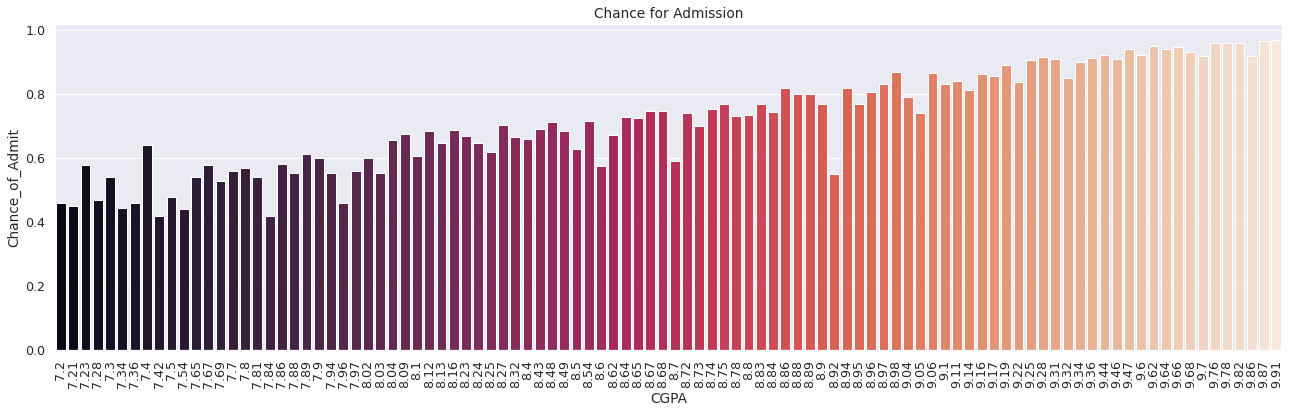

In [93]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=90)
plt.title("Chance for Admission")
sns.barplot(admission_analysis_cgpa_df.index, 
            admission_analysis_cgpa_df['Chance_of_Admit'],
           palette="rocket");

In [24]:
admission_analysis_df['Chance_of_Admit']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

We will be creating a new dataframe with GRE-wise data along with mean to aggregate the data for each group.

In [25]:
admission_analysis_df.sort_values('GRE_score', ascending=False).head(10)

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
429,430,340,115,5,0.95,5.0,4.5,9.06,1
84,85,340,115,5,0.94,4.5,4.5,9.45,1
81,82,340,120,4,0.96,5.0,5.0,9.50,1
143,144,340,120,4,0.97,4.5,4.0,9.92,1
202,203,340,120,5,0.97,4.5,4.5,9.91,1
284,285,340,112,4,0.94,5.0,4.5,9.66,1
33,34,340,114,5,0.90,4.0,4.0,9.60,1
384,385,340,113,4,0.96,5.0,5.0,9.74,1
25,26,340,120,5,0.94,4.5,4.5,9.60,1
47,48,339,119,5,0.89,4.5,4.0,9.70,0


In [26]:
admission_gre_df = admission_analysis_df.groupby('GRE_score')[['Chance_of_Admit', 'TOEFL_score', 'SOP']].mean()
admission_gre_df 

,Chance_of_Admit,TOEFL_score,SOP
GRE_score,,,
290,0.460000,102.000000,1.750000
293,0.640000,97.000000,2.000000
294,0.475000,94.000000,1.500000
295,0.512000,97.600000,2.100000
296,0.522000,98.200000,2.500000
297,0.498333,98.333333,2.333333
298,0.507000,99.000000,2.500000
299,0.537000,99.500000,2.600000
300,0.595833,100.166667,2.500000


Let's visualise for GRE  now. Using Seaborn Bar plot 

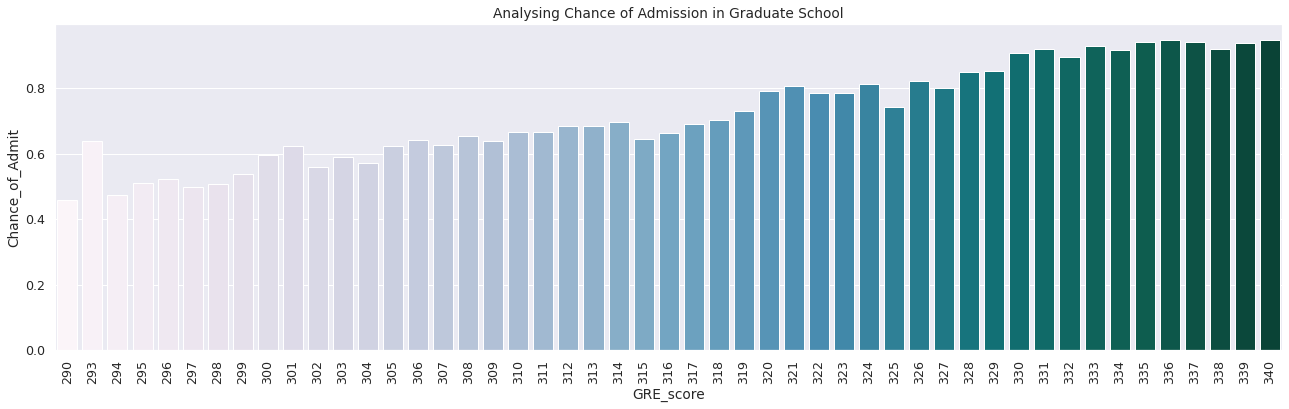

In [97]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=90)
plt.title("Analysing Chance of Admission in Graduate School")
sns.barplot(admission_gre_df.index, 
            admission_gre_df['Chance_of_Admit'],
           palette='PuBuGn');

Now we will visualise it by looking at the graduate universities rating in USA.

In [28]:
admission_analysis_df['University_rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University_rating, dtype: int64

We will be picking for top 10 CGPA through sorting the US Graduate admission based on CGPA in a descending trend.

In [30]:
admission_analysis_df.sort_values('CGPA', ascending=False).head(10)

,Serial_num,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
143,144,340,120,4,0.97,4.5,4.0,9.92,1
202,203,340,120,5,0.97,4.5,4.5,9.91,1
496,497,337,117,5,0.96,5.0,5.0,9.87,1
203,204,334,120,5,0.97,4.0,5.0,9.87,1
425,426,323,111,5,0.92,4.0,5.0,9.86,1
385,386,335,117,5,0.96,5.0,5.0,9.82,1
148,149,339,116,4,0.96,4.0,3.5,9.80,1
34,35,331,112,5,0.94,4.0,5.0,9.80,1
24,25,336,119,5,0.97,4.0,3.5,9.80,1
213,214,333,119,5,0.96,5.0,4.5,9.78,1


Plotting different histograms based on different admission criteria to represent their corresponding distribution by forming bins along the range of the parameters followed by drawing bars to show the number of observations that fall in each bin.

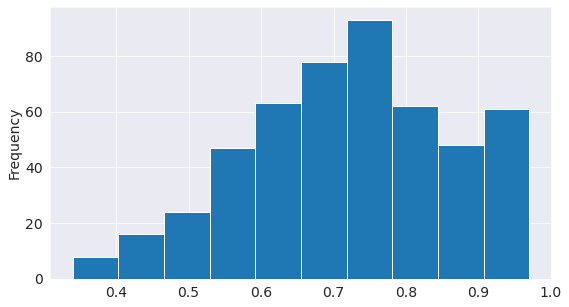

In [31]:
admission_analysis_df['Chance_of_Admit'].plot(kind='hist');

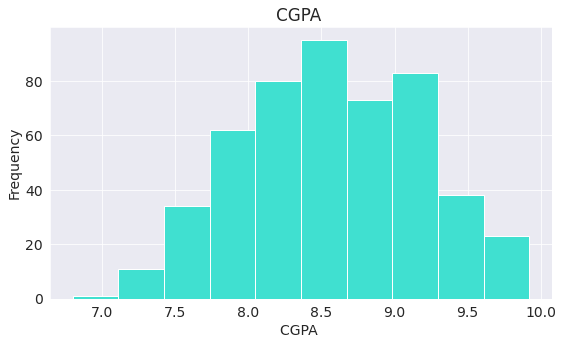

In [32]:
plt.title("CGPA ")
plt.xlabel("CGPA ")
plt.ylabel("Y axis")
admission_analysis_df['CGPA'].plot(kind='hist',
                                   color='turquoise');

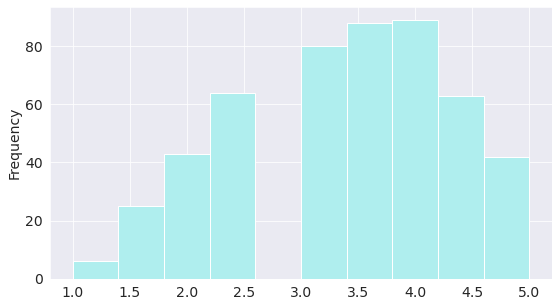

In [33]:
admission_analysis_df['SOP'].plot(kind='hist', color='paleturquoise');

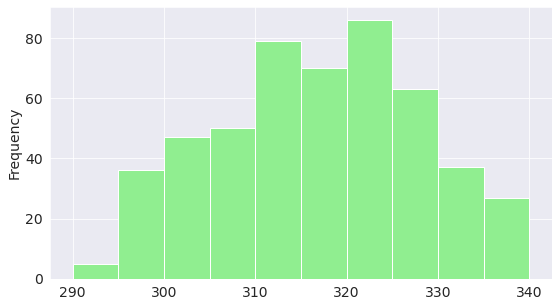

In [34]:
admission_analysis_df['GRE_score'].plot(kind='hist', color='lightgreen');

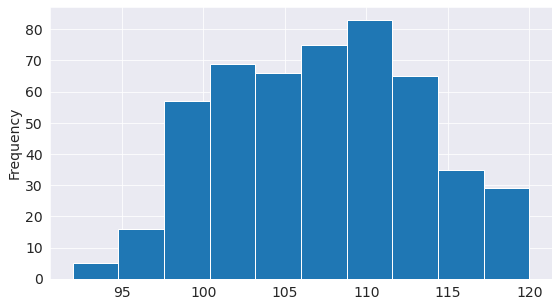

In [35]:
admission_analysis_df['TOEFL_score'].plot(kind='hist');

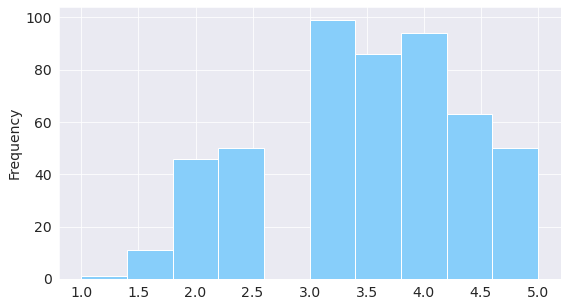

In [36]:
admission_analysis_df['LOR'].plot(kind='hist', color='lightskyblue');

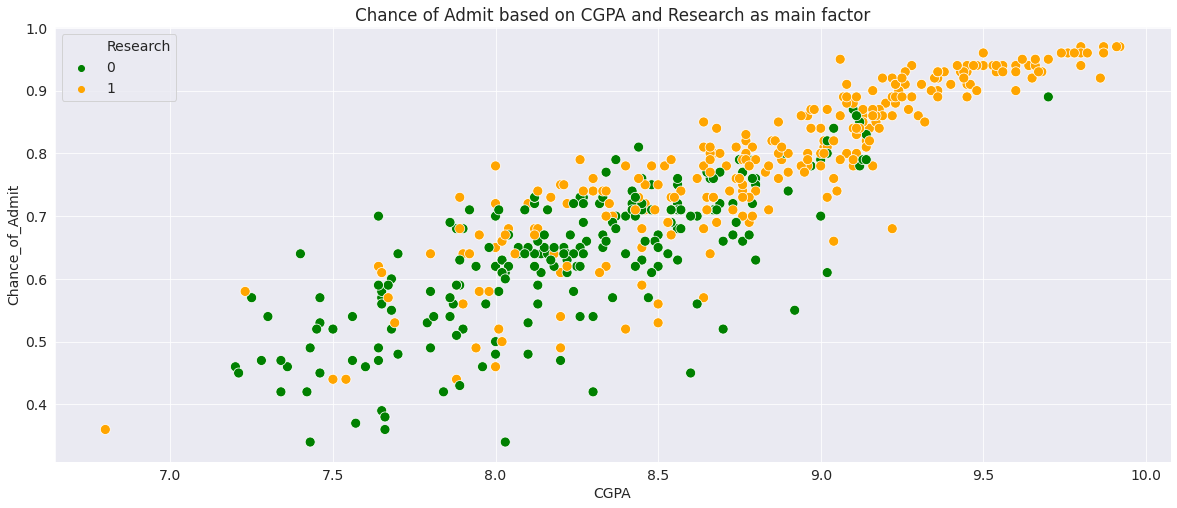

In [37]:
plt.figure(figsize=(20, 8))
plt.title('Chance of Admit based on CGPA and Research as main factor')


sns.scatterplot(admission_analysis_df['CGPA'],
                admission_analysis_df['Chance_of_Admit'],
                hue=admission_analysis_df['Research'],
                s=100,
                palette=['green','orange']);

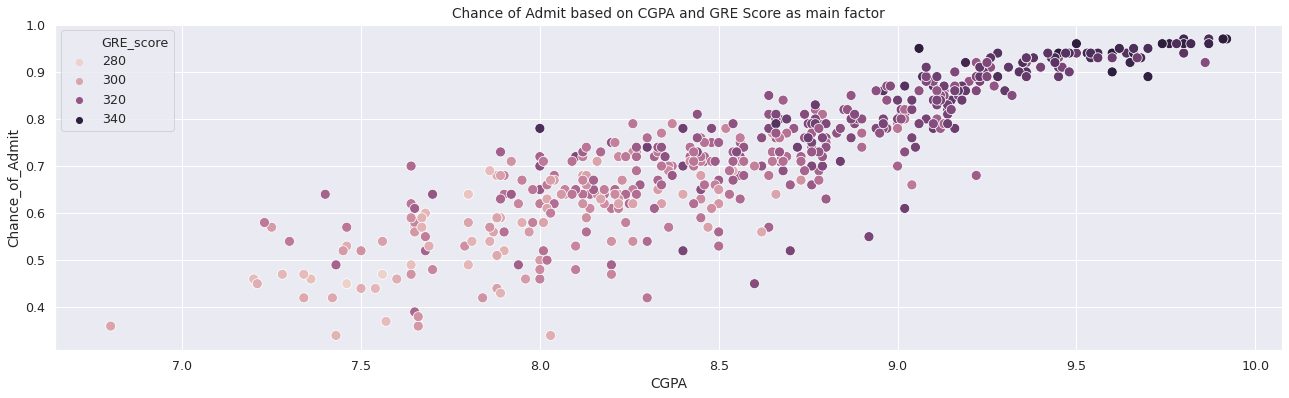

In [101]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and GRE Score as main factor')

sns.scatterplot(admission_analysis_df['CGPA'],
                admission_analysis_df['Chance_of_Admit'], 
                hue=admission_analysis_df['GRE_score'],
                s=100,
                #palette=['orange','brown','dodgerblue','red','green'],
               );

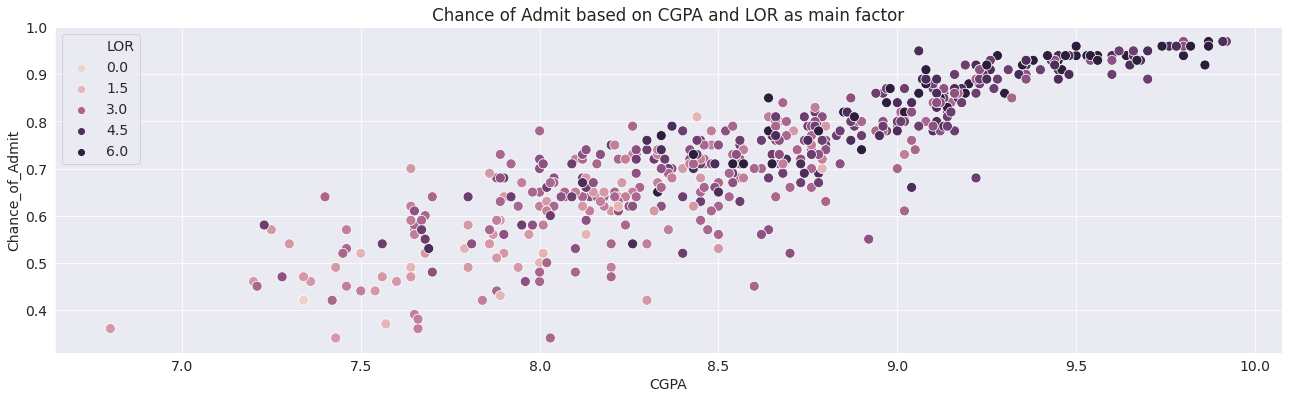

In [40]:

plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and LOR as main factor')

sns.scatterplot(admission_analysis_df['CGPA'],
                admission_analysis_df['Chance_of_Admit'],
                hue=admission_analysis_df['LOR'], s=100);

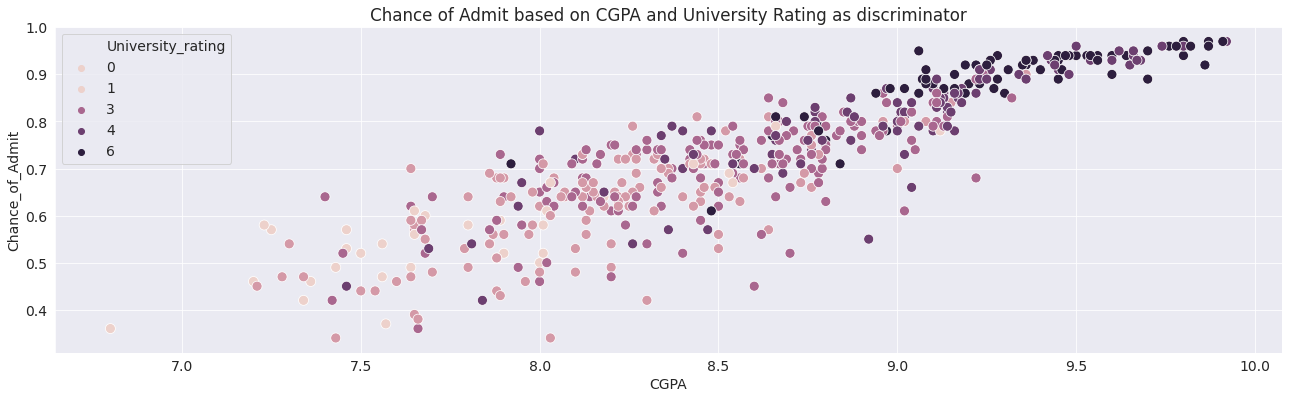

In [41]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and University Rating as discriminator')

sns.scatterplot(admission_analysis_df['CGPA'],
                admission_analysis_df['Chance_of_Admit'], 
                hue=admission_analysis_df['University_rating'],
                s=100);

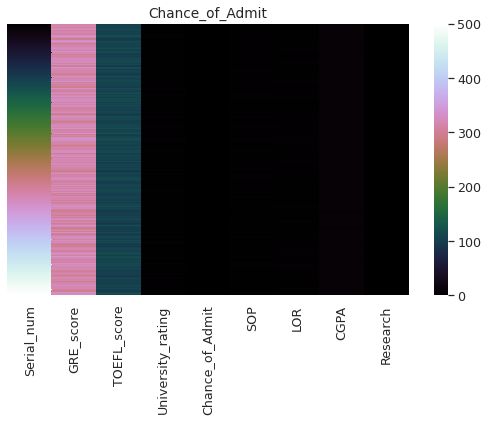

In [42]:
sns.set(font_scale=1.15)
plt.title("Chance_of_Admit")
sns.heatmap(admission_analysis_df,yticklabels=False,cmap="cubehelix");

All types of charts for all the columns as a main factor which will affect the admission criteria are been made above.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "himithnainwal/foreign-university-admission-criteria" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/himithnainwal/foreign-university-admission-criteria


'https://jovian.ml/himithnainwal/foreign-university-admission-criteria'

## Asking and Answering Questions

Here we would be solving some prediction questions which are general about the admission in US universities and there will bw answers for that either by computing or through visualisation .

In [45]:
admission_analysis_df
admission_analysis_df.set_index('Serial_num', inplace=True)

.set_index() is used in order to remove the first column which was starting from 0. We will replace it by Serial number whivh is provided in dataset. 

In [47]:
admission_analysis_df

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
Serial_num,,,,,,,,
1,337,118,4,0.92,4.5,4.5,9.65,1
2,324,107,4,0.76,4.0,4.5,8.87,1
3,316,104,3,0.72,3.0,3.5,8.00,1
4,322,110,3,0.80,3.5,2.5,8.67,1
5,314,103,2,0.65,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
496,332,108,5,0.87,4.5,4.0,9.02,1
497,337,117,5,0.96,5.0,5.0,9.87,1
498,330,120,5,0.93,4.5,5.0,9.56,1


#### Q1::What are the CGPA for top 20 candidates with highest chance of admission?

In [48]:
top= admission_analysis_df.sort_values('Chance_of_Admit', ascending=False).head(20)
top[['CGPA', 'Chance_of_Admit']]

,CGPA,Chance_of_Admit
Serial_num,,
203,9.91,0.97
144,9.92,0.97
25,9.80,0.97
204,9.87,0.97
72,9.76,0.96
214,9.78,0.96
497,9.87,0.96
82,9.50,0.96
131,9.76,0.96


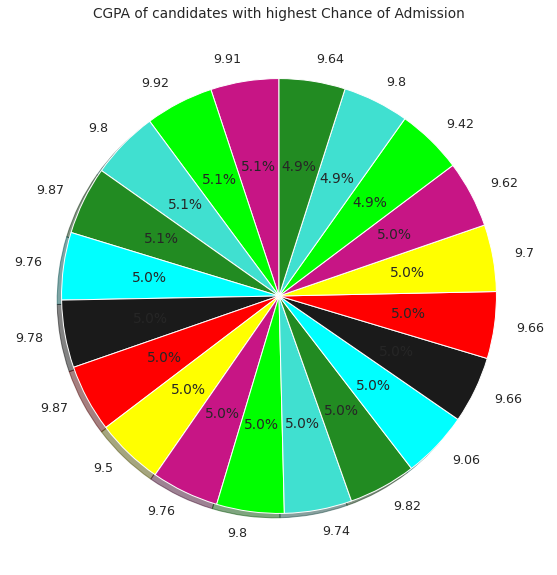

In [49]:
sns.color_palette("bright")
plt.figure(figsize=(22,10))
plt.xticks(rotation=90)
cols=['mediumvioletred','lime','turquoise','forestgreen','cyan','k','red','yellow']
#theme = plt.get_cmap('copper')
plt.title("CGPA of candidates with highest Chance of Admission")
#theme = plt.get_cmap('hsv')
plt.pie(top['Chance_of_Admit'],
        labels=top['CGPA'],
        shadow=True, 
        counterclock=True,
         colors=cols,
        autopct='%1.1f%%',
        startangle=90);
#theme = plt.get_cmap('hsv')

#### Q2: How many percent of candidates with 'Chance of Admit'>70% had Research experience? 

In [50]:
top_half_df = admission_analysis_df[admission_analysis_df['Chance_of_Admit']>0.50]
top_half_df
research_df = top_half_df.groupby('Research').count()
research_df

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA
Research,,,,,,,
0,189,189,189,189,189,189,189
1,272,272,272,272,272,272,272


In [51]:
research_percent_df = ( research_df.at[1, 'Chance_of_Admit'] / research_df['Chance_of_Admit'].sum() ) * 100
research_percent_df

59.00216919739696

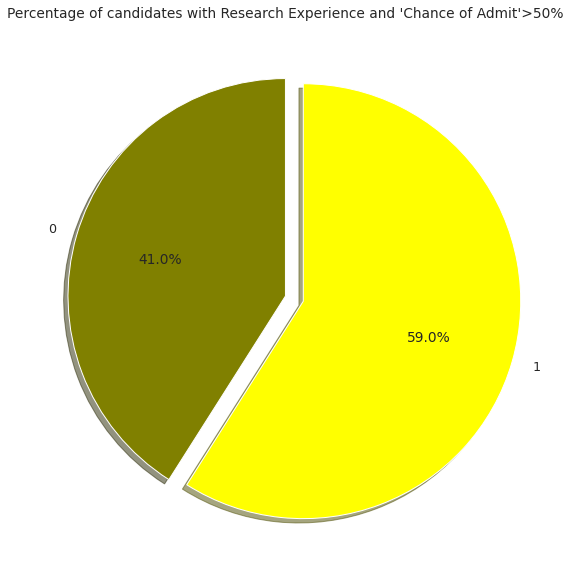

In [52]:
plt.figure(figsize=(22,10))
plt.title("Percentage of candidates with Research Experience and 'Chance of Admit'>50%")

plt.pie(research_df['Chance_of_Admit'],
        labels=research_df.index,
        autopct='%1.1f%%',
        colors=['olive','yellow'],
        explode=[0,0.08547],
        shadow=True,
        startangle=90);

In [53]:
from IPython.display import display
with pd.option_context('display.max_rows', 400):
    display(admission_analysis_df)

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
Serial_num,,,,,,,,
1,337,118,4,0.92,4.5,4.5,9.65,1
2,324,107,4,0.76,4.0,4.5,8.87,1
3,316,104,3,0.72,3.0,3.5,8.00,1
4,322,110,3,0.80,3.5,2.5,8.67,1
5,314,103,2,0.65,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
496,332,108,5,0.87,4.5,4.0,9.02,1
497,337,117,5,0.96,5.0,5.0,9.87,1
498,330,120,5,0.93,4.5,5.0,9.56,1


#### Q3: What were the GRE Scores Distribution of the candidates who got accepted into top ranked university?


In [54]:
top_univ_df = admission_analysis_df[admission_analysis_df['University_rating']==5]
top_univ_df.shape
top_univ_df

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
Serial_num,,,,,,,,
6,330,115,5,0.90,4.5,3.0,9.34,1
23,328,116,5,0.94,5.0,5.0,9.50,1
24,334,119,5,0.95,5.0,4.5,9.70,1
25,336,119,5,0.97,4.0,3.5,9.80,1
26,340,120,5,0.94,4.5,4.5,9.60,1
...,...,...,...,...,...,...,...,...
471,320,110,5,0.87,4.0,4.0,9.27,1
484,304,103,5,0.71,5.0,3.0,7.92,0
496,332,108,5,0.87,4.5,4.0,9.02,1


In [55]:
top_univ_df['GRE_score'].value_counts()
top_univ_df['GRE_score'].count()
gre_pct = ( top_univ_df['GRE_score'].value_counts() / top_univ_df['GRE_score'].count() ) * 100
gre_pct.round(2)
print("GRE Scores Percentage Distribution of Candidates Accepted into Top Ranked Universities is: ")
gre_pct.round(2)

GRE Scores Percentage Distribution of Candidates Accepted into Top Ranked Universities is: 


340    6.85
324    6.85
334    6.85
331    6.85
322    6.85
336    5.48
332    5.48
330    5.48
323    5.48
320    4.11
335    4.11
333    4.11
329    4.11
321    4.11
304    2.74
327    2.74
326    2.74
339    2.74
328    2.74
325    1.37
337    1.37
318    1.37
309    1.37
305    1.37
338    1.37
303    1.37
Name: GRE_score, dtype: float64

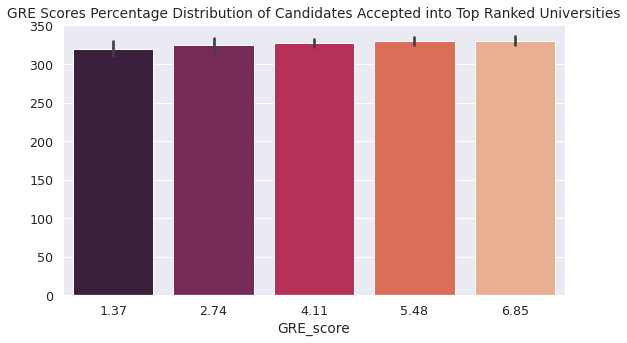

In [61]:
sns.barplot(gre_pct.round(2), 
            gre_pct.round(2).index,
           palette="rocket")
plt.title("GRE Scores Percentage Distribution of Candidates Accepted into Top Ranked Universities");

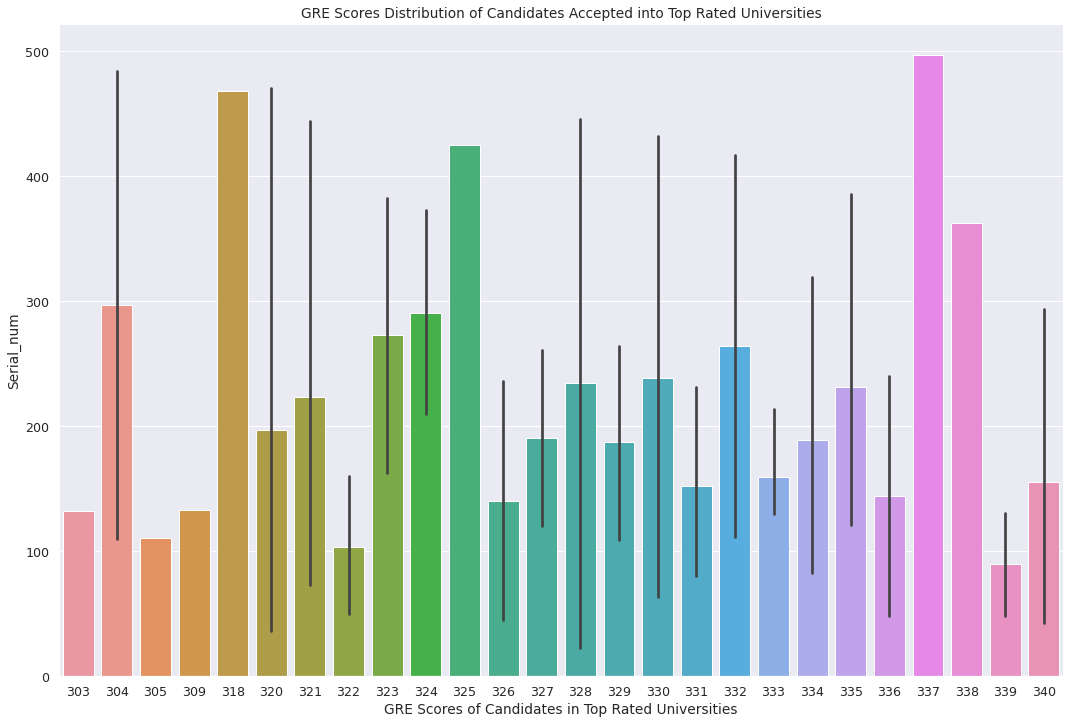

In [62]:
plt.figure(figsize=(18, 12))
sns.barplot('GRE_score', top_univ_df.index, data=top_univ_df);
plt.title("GRE Scores Distribution of Candidates Accepted into Top Rated Universities");
plt.xlabel('GRE Scores of Candidates in Top Rated Universities');

In [63]:
from IPython.display import display
with pd.option_context('display.max_rows',500):
    display(admission_analysis_df)

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
Serial_num,,,,,,,,
1,337,118,4,0.92,4.5,4.5,9.65,1
2,324,107,4,0.76,4.0,4.5,8.87,1
3,316,104,3,0.72,3.0,3.5,8.00,1
4,322,110,3,0.80,3.5,2.5,8.67,1
5,314,103,2,0.65,2.0,3.0,8.21,0
6,330,115,5,0.90,4.5,3.0,9.34,1
7,321,109,3,0.75,3.0,4.0,8.20,1
8,308,101,2,0.68,3.0,4.0,7.90,0
9,302,102,1,0.50,2.0,1.5,8.00,0


#### Q4: What is the Average and Distribution of Chance of Admit for applicants with (SOP && LOR) >= 3.5 ?

In [64]:
high_sop_lor_df = admission_analysis_df[(admission_analysis_df['SOP']>=3.5) & (admission_analysis_df['LOR']>=3.5)]
high_sop_lor_df

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
Serial_num,,,,,,,,
1,337,118,4,0.92,4.5,4.5,9.65,1
2,324,107,4,0.76,4.0,4.5,8.87,1
11,325,106,3,0.52,3.5,4.0,8.40,1
12,327,111,4,0.84,4.0,4.5,9.00,1
13,328,112,4,0.78,4.0,4.5,9.10,1
...,...,...,...,...,...,...,...,...
496,332,108,5,0.87,4.5,4.0,9.02,1
497,337,117,5,0.96,5.0,5.0,9.87,1
498,330,120,5,0.93,4.5,5.0,9.56,1


In [65]:
high_sop_lor_avg = high_sop_lor_df['Chance_of_Admit'].mean() * 100
print("Average Chance of Admit for applicants with (SOP && LOR) >= 3.5 is: {:.2f} %.".format(high_sop_lor_avg))

Average Chance of Admit for applicants with (SOP && LOR) >= 3.5 is: 81.85 %.


 Visulizing the values of SOP & LOR from the US Graduate Admission dataset using a contour plot. The shades of blue/red represent the density of SOR/LOR values in a region of the graph, respectively.

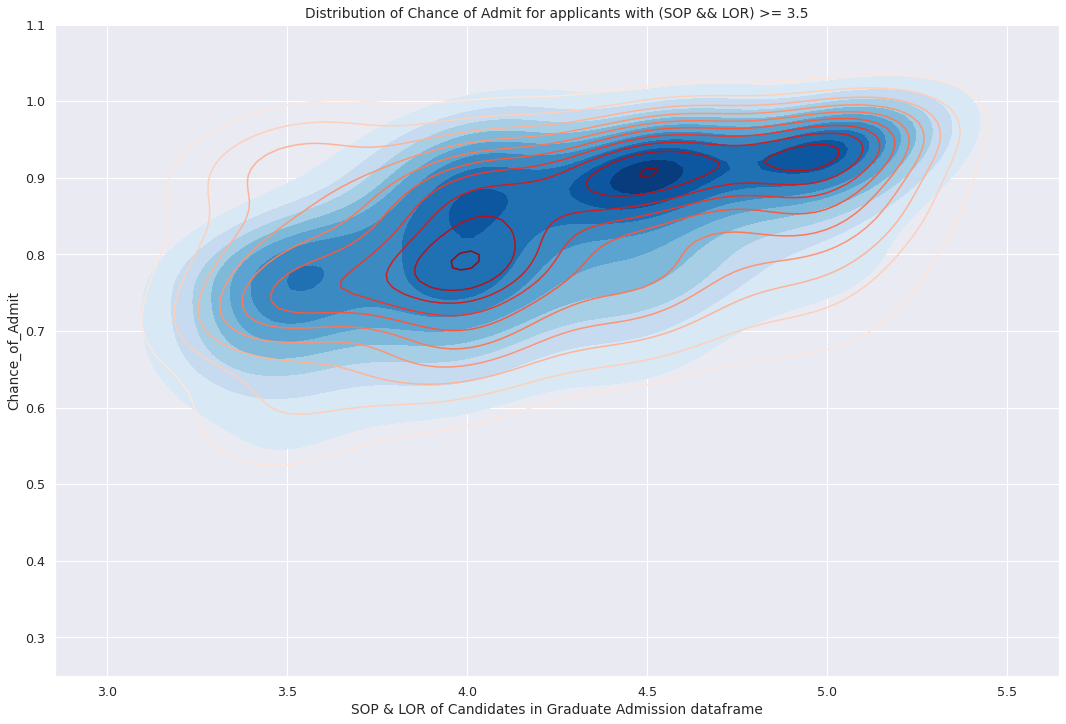

In [66]:
plt.figure(figsize=(18, 12))
plt.title("Distribution of Chance of Admit for applicants with (SOP && LOR) >= 3.5");

sns.kdeplot(high_sop_lor_df['SOP'], 
            high_sop_lor_df['Chance_of_Admit'],
            shade=True, cmap='Blues', 
            shade_lowest=False)
sns.kdeplot(high_sop_lor_df['LOR'], 
            high_sop_lor_df['Chance_of_Admit'], 
            cmap='Reds', 
            shade_lowest=False);
plt.xlabel("SOP & LOR of Candidates in Graduate Admission dataframe");

In [67]:
from IPython.display import display
with pd.option_context('display.max_rows', 400):
    display(admission_analysis_df)

,GRE_score,TOEFL_score,University_rating,Chance_of_Admit,SOP,LOR,CGPA,Research
Serial_num,,,,,,,,
1,337,118,4,0.92,4.5,4.5,9.65,1
2,324,107,4,0.76,4.0,4.5,8.87,1
3,316,104,3,0.72,3.0,3.5,8.00,1
4,322,110,3,0.80,3.5,2.5,8.67,1
5,314,103,2,0.65,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
496,332,108,5,0.87,4.5,4.0,9.02,1
497,337,117,5,0.96,5.0,5.0,9.87,1
498,330,120,5,0.93,4.5,5.0,9.56,1


###### 

 Frequency Distribution for which the "Chance of Admit", where the values on Y-axis are percentagess instead of counts.

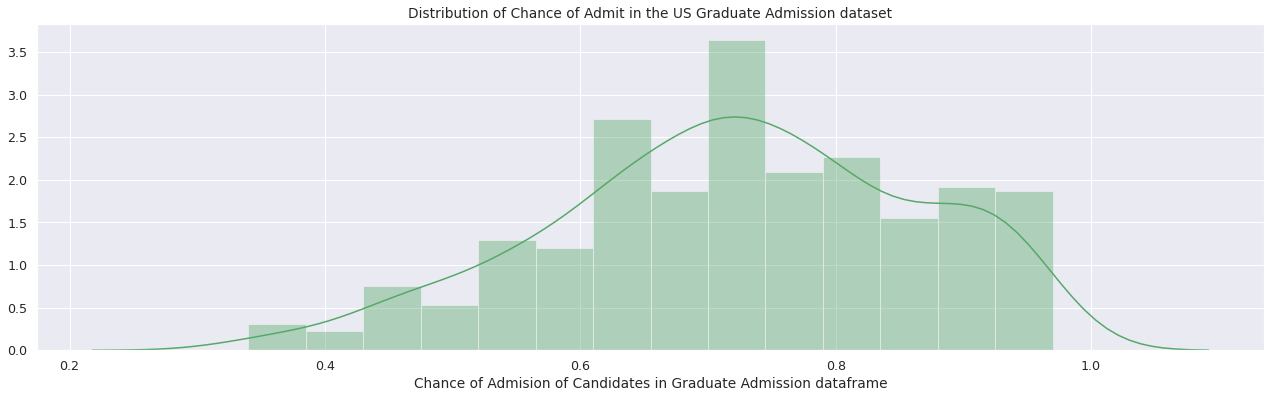

In [69]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=0)
plt.title("Distribution of Chance of Admit in the US Graduate Admission dataset")

sns.distplot(admission_analysis_df['Chance_of_Admit'], kde=True, color="g");

plt.xlabel("Chance of Admision of Candidates in Graduate Admission dataframe");

#### Q5: What are the Frequency Distribution of "Chance of Admit" property for all the Quartiles in the US Graduate Admission dataframe?

In [70]:
first_quartile_df = admission_analysis_df[(admission_analysis_df['Chance_of_Admit']<0.25)]
first_quartile_df['Chance_of_Admit']

Series([], Name: Chance_of_Admit, dtype: float64)

In [71]:
second_quartile_df = admission_analysis_df[(admission_analysis_df['Chance_of_Admit']>=0.25) & (admission_analysis_df['Chance_of_Admit']<0.5)]
second_quartile_df['Chance_of_Admit']

Serial_num
10     0.45
28     0.44
29     0.46
40     0.48
41     0.46
42     0.49
58     0.46
59     0.36
60     0.42
61     0.48
62     0.47
79     0.44
80     0.46
92     0.38
93     0.34
94     0.44
95     0.36
96     0.42
97     0.48
118    0.45
119    0.47
273    0.49
330    0.43
345    0.47
346    0.49
347    0.47
348    0.42
375    0.39
376    0.38
377    0.34
378    0.47
387    0.46
389    0.49
414    0.49
421    0.42
458    0.37
465    0.45
Name: Chance_of_Admit, dtype: float64

In [72]:
third_quartile_df = admission_analysis_df[(admission_analysis_df['Chance_of_Admit']>=0.5) & (admission_analysis_df['Chance_of_Admit']<0.75)]
third_quartile_df['Chance_of_Admit']

Serial_num
3      0.72
5      0.65
8      0.68
9      0.50
11     0.52
       ... 
492    0.54
493    0.53
494    0.62
495    0.68
499    0.73
Name: Chance_of_Admit, Length: 245, dtype: float64

In [73]:
forth_quartile_df = admission_analysis_df[(admission_analysis_df['Chance_of_Admit']>=0.75)]
forth_quartile_df['Chance_of_Admit']

Serial_num
1      0.92
2      0.76
4      0.80
6      0.90
7      0.75
       ... 
489    0.76
496    0.87
497    0.96
498    0.93
500    0.84
Name: Chance_of_Admit, Length: 218, dtype: float64

Validating the summation of the rows in all Quartiles to add up to the total number of applicants in the original admission dataset

In [74]:
first_quartile_df['Chance_of_Admit'].count() + second_quartile_df['Chance_of_Admit'].count() + third_quartile_df['Chance_of_Admit'].count() + forth_quartile_df['Chance_of_Admit'].count()

500

In [75]:
import jovian

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "himithnainwal/foreign-university-admission-criteria" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/himithnainwal/foreign-university-admission-criteria


'https://jovian.ml/himithnainwal/foreign-university-admission-criteria'

## Inferences and Conclusion

Finally we would be summarising that we get the outcomes from the analysis .


For a applicant main primary factor CGPA plays a important rolein getting admission to top universities .

We would do this through seaborn plot.

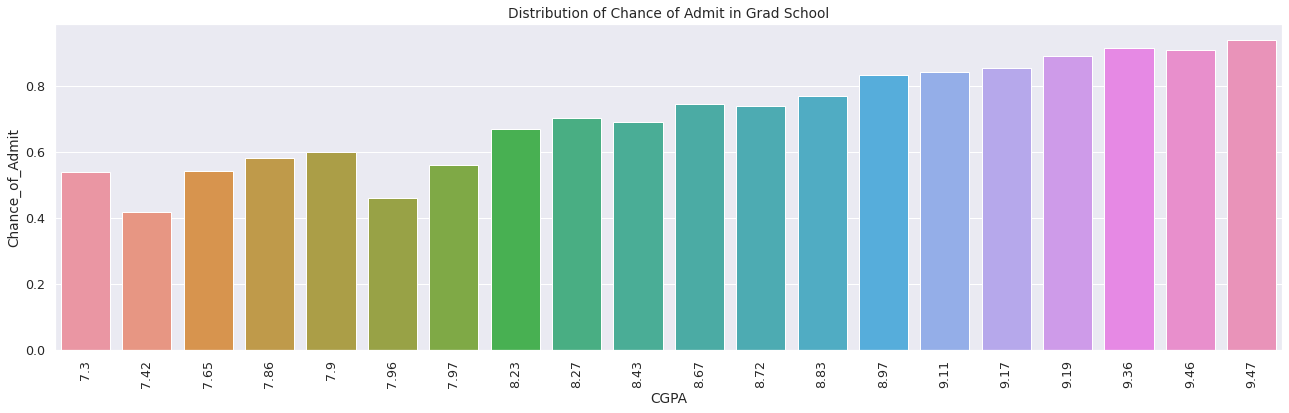

In [78]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=90)
plt.title("Distribution of Chance of Admit in Grad School")
sns.barplot(admission_analysis_cgpa_df.tail(20).index,
            admission_analysis_cgpa_df['Chance_of_Admit'].tail(20));

Applicant GRE and TOEFL Scores are secondary decisive factors but higher GRE and TOEFL score , the greater is the chance to get admission into higher rated universities.

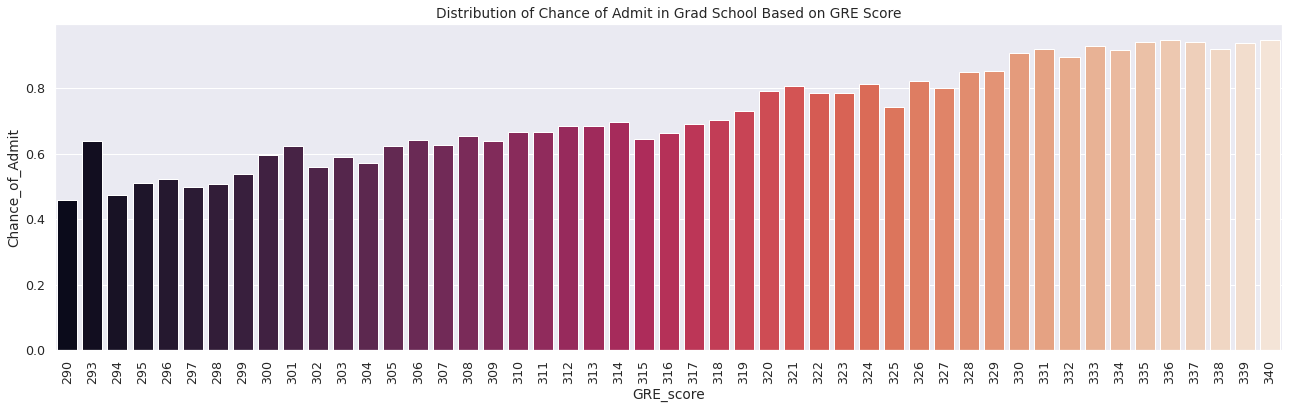

In [102]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=90)
plt.title("Distribution of Chance of Admit in Grad School Based on GRE Score")
sns.barplot(admission_gre_df.index,
            admission_gre_df['Chance_of_Admit'],
           palette='rocket');

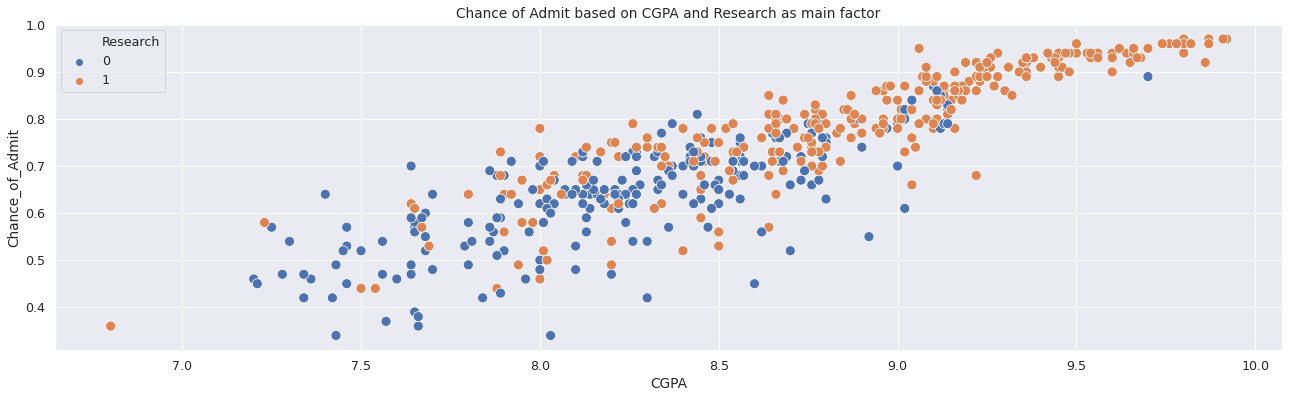

In [86]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and Research as main factor')
sns.scatterplot(admission_analysis_df['CGPA'],
                admission_analysis_df['Chance_of_Admit'],
                hue=admission_analysis_df['Research'],
                s=100);

In [ ]:
import jovian

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "himithnainwal/foreign-university-admission-criteria" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/himithnainwal/foreign-university-admission-criteria


'https://jovian.ml/himithnainwal/foreign-university-admission-criteria'

## References and Future Work

You can move on to kaggle for further learning.
As time increases more data and more deeper analysis.

In Future Works, we can combine university dataset from different countries and we can find ouut which one is best regarding requirements,country wise, subjects , research and many more factors.

You can go to geeksforgeeks.com or documentation of all libraries I have used .

In [89]:
import jovian

In [90]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "himithnainwal/foreign-university-admission-criteria" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/himithnainwal/foreign-university-admission-criteria


'https://jovian.ml/himithnainwal/foreign-university-admission-criteria'